In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

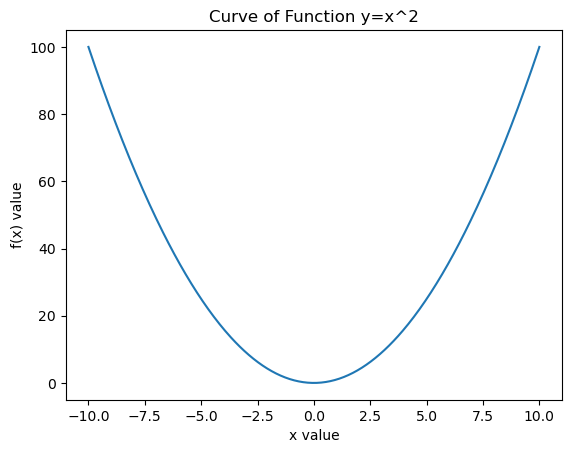

In [5]:
x_plot = np.linspace(-10,10,400)
y_plot = torch.tensor(x_plot)**2

# 绘制曲线
plt.plot(x_plot,y_plot)

plt.xlabel('x value' )
plt.ylabel('f(x) value')
plt.title('Curve of Function y=x^2') 
plt.show()

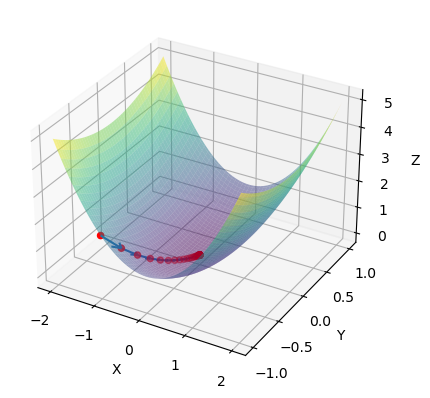

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义函数
def f(x, y):
    return x**2 + y**2

# 定义梯度
def gradient(x, y):
    return np.array([2*x, 2*y])

# 梯度下降算法
def gradient_descent(x0, y0, learning_rate=0.1, max_iter=100):
    x_values, y_values = [x0], [y0]
    for _ in range(max_iter):
        x, y = x_values[-1], y_values[-1]
        grad = gradient(x, y)
        x_new = x - learning_rate * grad[0]
        y_new = y - learning_rate * grad[1]
        x_values.append(x_new)
        y_values.append(y_new)
        if np.linalg.norm(grad) < 1e-6:
            break
    return x_values, y_values

# 初始点
x0, y0 = -1, -1

# 执行梯度下降
x_values, y_values = gradient_descent(x0, y0)

# 绘制函数的3D图像
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)

# 绘制迭代点
ax.scatter(x_values, y_values, [f(x_val, y_val) for x_val, y_val in zip(x_values, y_values)], color='r')

# 绘制梯度向量
for i in range(1, len(x_values)):
    x1, y1 = x_values[i-1], y_values[i-1]
    x2, y2 = x_values[i], y_values[i]
    u = x2 - x1
    v = y2 - y1
    w = f(x2, y2) - f(x1, y1)
    z1 = f(x1, y1)
    z2 = f(x2, y2)
    length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)
    ax.quiver(x1, y1, f(x1, y1), u, v, w, length=length, normalize=True)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()